In [66]:
import pandas as pd
import numpy as np
import re

import functools
from nltk.util import skipgrams
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('lipo/train.csv', header=None)
val = pd.read_csv('lipo/val.csv', header=None)

In [68]:
print(train.shape)
train.head()

(3360, 3)


,0,1,2
0,CHEMBL645,0.10,CC(C)NCC(O)COc1ccc(COCCOC(C)C)cc1
1,CHEMBL443320,-1.34,Cc1ccc(NC(=N)N)cc1C
2,CHEMBL322122,-0.15,CC(C)C(=O)NCCNCC(O)COc1ccc(O)cc1
3,CHEMBL74582,3.07,C[C@@](O)(C(=O)Nc1ccc(cc1Cl)S(=O)(=O)NCC=C)C(F...
4,CHEMBL546,0.20,CC(C)NCC(O)COc1ccccc1OCC=C


In [4]:
test_text = [list(smiles) for smiles in train[2]]
val_text = [list(smiles) for smiles in val[2]]

In [5]:
skip = functools.partial(skipgrams, n=3, k=2)
vectorizer = CountVectorizer(analyzer=skip)
vectorizer.fit(test_text)

CountVectorizer(analyzer=functools.partial(<function skipgrams at 0x000002C45D3D11F8>, n=3, k=2))

In [6]:
X_train = vectorizer.transform(test_text)
y_train = train[1]
X_val = vectorizer.transform(val_text)
y_val = val[1]

In [57]:
def R_squared(y, y_pred):
    residual = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
    r2 = tf.subtract(1.0, tf.divide(residual, total))
    return r2

In [76]:
model = Sequential()
model.add(layers.Dense(1024, kernel_regularizer=regularizers.l2(l=0.001), input_dim=input_dim, activation='relu'))
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(l=0.001), activation='relu'))
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(l=0.001), activation='relu'))
model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(l=0.001), activation='relu'))
model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(l=0.001), activation='relu'))
model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(l=0.001), activation='relu'))
model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(l=0.001), activation='relu'))
model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(l=0.001), activation='relu'))
model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(l=0.001), activation='relu'))
model.add(layers.Dense(1, activation=None))
model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['mean_squared_error'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 1024)              5694464   
_________________________________________________________________
dense_49 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_50 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_51 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_52 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_53 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_54 (Dense)             (None, 128)              

In [77]:
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), batch_size=128)

Train on 3360 samples, validate on 420 samples
Epoch 1/25
3360/3360 [==============================] - 2s 514us/sample - loss: 5.4622 - mean_squared_error: 2.4510 - val_loss: 3.3837 - val_mean_squared_error: 1.0880
Epoch 2/25
3360/3360 [==============================] - 1s 341us/sample - loss: 2.8135 - mean_squared_error: 0.7985 - val_loss: 2.6149 - val_mean_squared_error: 0.8524
Epoch 3/25
3360/3360 [==============================] - 1s 346us/sample - loss: 2.1343 - mean_squared_error: 0.5202 - val_loss: 2.2812 - val_mean_squared_error: 0.8075
Epoch 4/25
3360/3360 [==============================] - 1s 350us/sample - loss: 1.7317 - mean_squared_error: 0.3484 - val_loss: 2.0256 - val_mean_squared_error: 0.7328
Epoch 5/25
3360/3360 [==============================] - 1s 350us/sample - loss: 1.4899 - mean_squared_error: 0.2612 - val_loss: 1.9134 - val_mean_squared_error: 0.7502
Epoch 6/25
3360/3360 [==============================] - 1s 343us/sample - loss: 1.3331 - mean_squared_error: 0.21

In [78]:
predictions = model.predict(X_val)
R_squared(y_val, predictions.flatten())

<tf.Tensor: id=116424, shape=(), dtype=float64, numpy=0.5277097176724062>

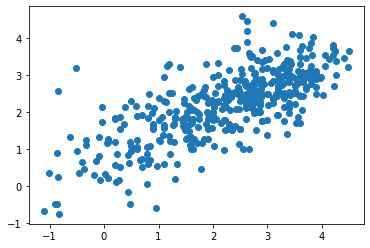

In [79]:
plt.scatter(y_val, predictions)